# **Dogs vs. Cats Redux: Kernels Edition** 
##### K. Neteland - 181210

<img src="https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg" width="620" height="351" align="center"/>

##### In 2013 Kaggle hosted the original dogs versus cats challenge as a for-fun competition. Rumour has it that the lack of an online coding environment lead to approached sharing by scratching primitive glpyhs on cave walls with sticks and sharp objects. Now the classification problem is reintroduced back on Kaggle as a playground competition with kernels enabled. Although modern techniques may make light of this once-difficult problem, it is through practice of new techniques on old datasets that we will make light of machine learning's future challenges.

##### The rule is simple: The train folder contains 25,000 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 12,500 images, named according to a numeric id. For each image in the test set, you should predict a probability that the image is a dog (1 = dog, 0 = cat).

### **References**

* ##### __[Kaggle](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition)__ - Source for discussion on data and solutions presented. 
* ##### __[Images and Pixels](https://processing.org/tutorials/pixels/)__ - from the book Learning Processing by Daniel Shiffman.
* ##### __[Kernel - Image processing](https://en.wikipedia.org/wiki/Kernel_(image_processing))__ - Wikipedia.
* ##### __[Introduction to computer vision](http://ai.stanford.edu/~syyeung/cvweb/tutorial1.html)__ - Stanford.edu tutorial - image filtering.
* ##### __[Image Filtering](http://machinelearninguru.com/computer_vision/basics/convolution/image_convolution_1.html)__ - Machine Learning Guru.
* ##### __[Keras](https://keras.io/)__ - Keras documentation.
* ##### __[The Keras Blog](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)__ - Building powerful image classification models using very little data.
* ##### __[CNN - Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)__ - Understanding of Convolutional Neural Network (CNN) — Deep Learning by Prabhu.
* ##### __[CNN in Keras](https://www.learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/)__ - Image Classification using Convolutional Neural Networks in Keras.
* ##### __[TensorFlow](https://www.tensorflow.org/guide/low_level_intro)__ - TensorFlow guide.





### **Strategies**

##### From the information given on Kaggle I already have a great deal of knowledge about the data set. The data is pre-divided into a test set of 12 500 images and a training set of 25 000 images equally separated into pictures of dogs and cats. The content of the data is fitting for a classification project, which is also the reason why I chose this particular set since the last assignment was a regression problem. I am curious to work with a different set of tools, learn about CNNs and deep learning in general. 

<img src="http://scikit-learn.org/stable/_static/ml_map.png" width="1061" height="661" align="center"/>

##### Following the flow chart taken from __[scikit-learn](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html?fbclid=IwAR0hJnqIJpjQMpINaXUY1_PHAu0e4TUmQ8WHDbWLj9Ky2SO7VpKxLLcK6rw)__ my data set falls into the Support Vector Machines/Ensemble Classifiers subset within Classification problems. As mentioned earlier this data-set was released on Kaggle in 2013 and was concidered a great challenge at the time given the methods that were available. Since then alot has changed in the world of AI with deep learning models, for example re-introducing the neural network but with more layers and more powerful hardware that lets us computate bigger data-sets which again can lead to more precise models. The DAT158 course gave a quick introduction to Deep Learning without going into too much details about implementation and different frameworks available therefore a big part of this assignment is to study and understand the underlying tecniques and technologies needed. 

##### __The big picture - CNN__

<img src="https://cdn-images-1.medium.com/max/800/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg" width="700" height="236" align="center"/>


* ##### __Images and convolution__

    * ##### "A digital image is nothing more than data—numbers indicating variations of red, green, and blue at a particular location on a grid of pixels. Most of the time, we view these pixels as miniature rectangles sandwiched together on a computer screen. With a little creative thinking and some lower level manipulation of pixels with code, however, we can display that information in a myriad of ways." - Daniel Shiffman
    
##### An image matrix consists of pixels with values between 0 - 255. For black/white image, 0 will be black and 255 white. For RGB colour photos an image will have three channels one for each colour representation ranging between 0 - 255 R[0,255], G[0-255] and B[0,255], and each pixel consist of three values representing the colour hue. Note that this will give us 256*256*256 = 16,777,216 combinations of colours. 
##### The example below shows how a greyscale image (one channel) is presented in a matrix. (From Stanford.edu)

<img src="http://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png" width="704" height="290" align="center"/>


##### Convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. This is related to a form of mathematical convolution. It should be noted that the matrix operation being performed - convolution - is not traditional matrix multiplication, despite being similarly denoted by *.

For example, if we have two three-by-three matrices, the first a kernel, and the second an image piece, convolution is the process of flipping both the rows and columns of the kernel and then multiplying locally similar entries and summing. The element at coordinates [2, 2] (that is, the central element) of the resulting image would be a weighted combination of all the entries of the image matrix, with weights given by the kernel: 


<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/570600fdeed436d98626278f22bf034ff5ab5162" width="912" height="76" align="center"/>

##### Below is an overview of some common kernels, or filters, being applied to an image:



<img src="https://cdn-images-1.medium.com/max/1600/1*uJpkfkm2Lr72mJtRaqoKZg.png" width="349" height="564" align="center"/>
    


Let us apply the knowledge to the dog and cat photo used in the intro of this notebook to further investigate the outcome of a convolution between a kernel and an image. 

image matrix size:  (420, 800, 3)

 First 5 columns and rows of the image matrix: 
 [[[ 40 102 143]
  [ 47 106 148]
  [ 42 101 143]
  [ 36  95 137]
  [ 35  92 135]]

 [[ 50 112 153]
  [ 56 118 159]
  [ 50 109 151]
  [ 41 100 142]
  [ 37  94 137]]

 [[ 48 110 151]
  [ 57 119 160]
  [ 54 115 159]
  [ 47 106 150]
  [ 40  99 143]]

 [[ 37 100 143]
  [ 49 112 155]
  [ 57 118 162]
  [ 54 115 159]
  [ 48 107 151]]

 [[ 39 102 146]
  [ 48 111 155]
  [ 60 123 167]
  [ 62 123 168]
  [ 53 114 158]]]


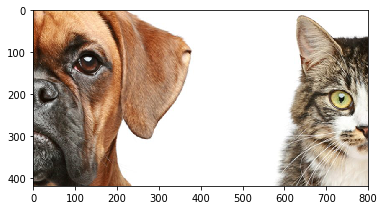

In [72]:
from skimage import io  #Collection of algorithms for image processing
img = img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg')
print('image matrix size: ', img.shape) #Print the shape of the image
print('\n First 5 columns and rows of the image matrix: \n', img[:5, :5]*255)#skimage uses range [0,1] instead of [0,255] therefore multiply with 255
plt.imshow(img)

##### Looking at the matrix we can see that we're dealing with a RGB image. Notice how each pixel consist of three values, each representing the RGB value. For simplicity I'm going to transfer the image to grayscale. 

image matrix size:  (420, 800)

 First 5 columns and rows of the image matrix: 
 [[164.2189 159.5093 164.5093 170.5093 173.0122]
 [154.2189 148.2189 156.5093 165.5093 171.0122]
 [156.2189 147.2189 150.7901 159.3651 166.3651]
 [166.2872 154.2872 147.7901 150.7901 158.3651]
 [164.2151 155.2151 143.2151 142.718  151.7901]]


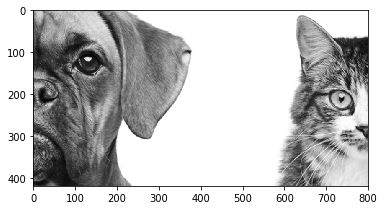

In [73]:
from skimage import io  #Collection of algorithms for image processing
import matplotlib.pyplot as plt
img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg', as_gray=True) #Import the image
print('image matrix size: ', img.shape) #Print the shape of the image
print('\n First 5 columns and rows of the image matrix: \n', img[:5, :5]*255) #skimage uses range [0,1] instead of [0,255]
plt.imshow(img, cmap='gray') #Manually asserting gray scale to image plot since the range adjustment does not apply to the image

##### Notice how the matrix now consist of a single value for each pixel, which makes the convolution process easier. Each kernel, or filter,  presented has a specific task to perform. The sharpen kernel accentuate edges but with the cost of adding noise to those area of the image which colors are changing gradually. The output of image convolution is calculated as follows:

* ##### Flip the kernel both horizontally and vertically. As our selected kernel is symetric, the flipped kernel is equal to the original.
* ##### Put the first element of the kernel at every pixel of the image (element of the image matrix). Then each element of the kernel will stand on top of an element of the image matrix.


<img src="http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/1.JPG" width="688" height="489" align="center"/>

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


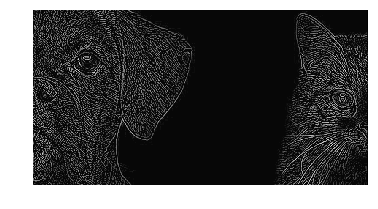

In [55]:
    import numpy as np
    import scipy.signal
    import matplotlib.pyplot as plt
    from skimage import io, color
    from skimage import exposure
    img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg')    # Load the image
    img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
    # apply sharpen filter to the original image
    sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    image_sharpen = scipy.signal.convolve2d(img, sharpen_kernel, 'valid')
    # apply edge detection filter to the sharpen image
    edge_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    edges = scipy.signal.convolve2d(image_sharpen, edge_kernel, 'valid')
    # apply blur filter to the edge detection filtered image
    blur_kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0;
    denoised = scipy.signal.convolve2d(edges, blur_kernel, 'valid')
    # Adjust the contrast of the filtered image by applying Histogram Equalization
    denoised_equalized = exposure.equalize_adapthist(denoised/np.max(np.abs(denoised)), clip_limit=0.03)
    plt.imshow(denoised_equalized, cmap=plt.cm.gray)    # plot the denoised_clipped
    plt.axis('off')
    plt.show()


 First 5 columns and rows of the image_sharpen matrix: 
 [[507.3663 320.5994 336.0186 349.5157 331.2369]
 [302.4378 123.6381 153.5189 170.1506 163.3064]
 [313.3695 126.5794 143.0671 163.3709 162.2151]
 [356.7148 154.9247 139.868  145.7122 150.0122]
 [348.1456 161.9305 126.1372 127.5796 140.7843]]


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


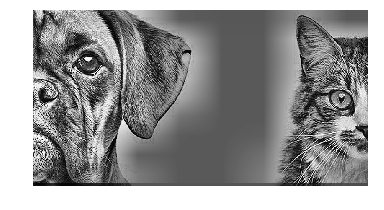

In [54]:
    import numpy as np
    import scipy
    from skimage import io, color
    from skimage import exposure
    import matplotlib.pyplot as plt
    img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg')    # Load the image
    img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    # you can use 'valid' instead of 'same', then it will not add zero padding
    image_sharpen = scipy.signal.convolve2d(img, kernel, 'same')
    print('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)
    # Adjust the contrast of the filtered image by applying Histogram Equalization 
    image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
    plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()


 First 5 columns and rows of the image_sharpen matrix: 
 [[123.6381 153.5189 170.1506 163.3064 188.9988]
 [126.5794 143.0671 163.3709 162.2151 181.0805]
 [154.9247 139.868  145.7122 150.0122 169.8738]
 [161.9305 126.1372 127.5796 140.7843 154.5093]
 [157.9968 139.9343 123.2093 156.5796 167.7122]]


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


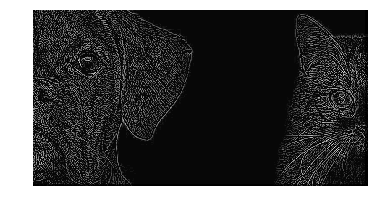

In [56]:
    import numpy as np
    import scipy.signal
    import matplotlib.pyplot as plt
    from skimage import io, color
    from skimage import exposure
    img = io.imread('https://assets.rebelcircus.com/blog/wp-content/uploads/2017/11/4234234-85.jpg')    # Load the image
    img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)
    kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    # we use 'valid' which means we do not add zero padding to our image
    edges = scipy.signal.convolve2d(img, kernel, 'valid')
    print('\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255)
    # Adjust the contrast of the filtered image by applying Histogram Equalization
    edges_equalized = exposure.equalize_adapthist(edges/np.max(np.abs(edges)), clip_limit=0.03)
    plt.imshow(edges_equalized, cmap=plt.cm.gray)    # plot the edges_clipped
    plt.axis('off')
    plt.show()


* ##### 2 - Feature extractions. How does it work?
* ##### 3 - Feature vectors. What are they used for?
* ##### 4 - Convolutional Neural Networks. How are they working?
* ##### 5 - TensorFlow. What does it do?



### **Prerequisitions**

##### **Technologies:**
##### Deep Learning/CNN: Keras, TensorFlow ....TODO
##### **HW:**
##### GPU --> __[GTX 1080Ti](https://developer.nvidia.com/cuda-gpus)__
##### CPU --> Intel i7 7700k
##### RAM --> 16GB 3200MHz 
##### **Environments:**
##### __[Linux - Ubuntu](https://www.ubuntu.com/)__
##### __[CUDA 9.2](https://docs.nvidia.com/cuda/archive/9.2/)__
##### __[Nvidia Docker](https://github.com/NVIDIA/nvidia-docker)__
##### __[Docker ML Environment](https://github.com/181192/P030-MLDockerEnv)__
##### **DATA:**
##### __[Dataset](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data)__
##### Layers of a picture, quality, size, how images are processed. https://processing.org/tutorials/pixels/


### **Setup**

##### TODO - Import all libs

### **Get the data**

##### Import data from folder, divide into test/train

### **Gain insights**

##### Look at the data to gain understanding. Image size matters? RGB or less layers for easier processing?

### **Prepare the data**

##### Prepare the data for ML

### **Select model and train**

##### Prepare the CNN in Keras -> TensorFlow

### **Fine tuning**

##### Tune hyperparameters, loss function, back propagation, look at and evaluate the outcome of the model -> overfitting? Less layers? Max Pooling? ect

### **Present solution**

##### Submissions are scored on the log loss:

##### LogLoss=−1n∑i=1n[yilog(y^i)+(1−yi)log(1−y^i)],

##### where

* #####    n     : is the number of images in the test set
* #####    y^i   : is the predicted probability of the image being a dog
* #####    yi    : is 1 if the image is a dog, 0 if cat
* #####    log() : is the natural (base e) logarithm

##### A smaller log loss is better.

##### For each image in the test set, you must submit a probability that image is a dog. The file should have a header and be in the following format:

##### id,label
##### 1,0.5
##### 2,0.5
##### 3,0.5
##### ...

### **Conclusion**

##### This model is based on binary classification of dog and cat images. Transferred learning to another binary classification project could be applicable. The obvious weakness is that if the model is presented with a photo that is not of either a dog or a cat its limitation would classify it as one or another due to the architecture of the network. If it's not a dog, it's a cat and vice verca.